# Linear Regression

By Jen Selby and Carl Shan

This Jupyter Notebook will introduce to you to how to make a Linear Regression model using the Sci-kit Learn (aka `sklearn`) Python library.

You can see basic example here:
> http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

and full documentation of the sklearn linear_model module here:
> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Instructions

0. Make sure you've read and learned a bit about the Linear Regression model. [Click here for course notes.](https://jennselby.github.io/MachineLearningCourseNotes/#linear-regression)
1. Read through the instructions and code behind the following sections:

    * [Setup](#Setup)
    * [Fake Data Generation](#Fake-Data-Generation)
    * [Training](#Training)
    * [Results and Visualization](#Results-and-Visualization)
2. Then, pick and complete at least one of the set of exercises (Standard or Advanced) and write code that answers each set of questions.
    * [Option 1 - Standard Difficulty](#Exercise-Option-#1---Standard-Difficulty)
    * [Option 2 - Standard Difficulty](#Exercise-Option-#2---Standard-Difficulty)
    * [Option 3 - Advanced Difficulty](#Exercise-Option-#3---Advanced-Difficulty)
    * [Option 4 - Advanced Difficulty](#Exercise-Option-#4---Advanced-Difficulty)

## Setup

First, make sure you have installed all of the necessary Python libraries, following [the instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3).

You should have `sklearn`, `numpy`, `matplotlib` and `pandas` installed.

If you haven't installed them, use `pip install <library here>` to install them in your Terminal.

Next, we want to make sure we can display our graphs in this notebook and import all of the libraries we'll need into the notebook.

In [43]:
# We're going to be doing some plotting, and we want to be able to see these plots.
# To display graphs in this notebook, run this cell.
%matplotlib inline

In [44]:
# We're now going to import some important libraries

import numpy.random # for generating a noisy data set
from sklearn import linear_model # for training a linear model

import matplotlib.pyplot # for plotting in general
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

import pandas as pd

## Fake Data Generation

We're going to generate some fake data to test out our ideas about linear regression. These constant variables decide some of the characteristics of our data: the `x` range (which will also be used to set the size of the graph later) and how many inputs we should generate.

In [45]:
# Setting the limits and number of our first, X, variable

MIN_X = -10
MAX_X = 10
NUM_INPUTS = 50

### Fake Dataset 1 - Single x Variable

Our first dataset has just one input feature. We are going to pick out 50 random real numbers between our min and max. Then, we will generate one output for each of these inputs following the function $y = 0.3x + 1$.

In [46]:
# randomly pick numbers for x
x_one_x = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1))

print(x_one_x)

[[ 5.85439592]
 [ 6.93239973]
 [ 6.553401  ]
 [ 9.94197954]
 [-6.26491684]
 [-8.70297269]
 [ 9.31915384]
 [-4.09486835]
 [-1.23883902]
 [ 0.42019339]
 [-5.33045871]
 [-2.16215421]
 [ 3.60411633]
 [-8.60635495]
 [-3.86559186]
 [ 8.49421822]
 [ 7.52801797]
 [ 9.52348462]
 [ 6.46732266]
 [-5.71368372]
 [ 8.75281777]
 [ 2.19605242]
 [ 0.70050543]
 [ 4.64726137]
 [ 7.02734038]
 [-8.04271065]
 [-1.53153388]
 [-1.35823261]
 [ 4.51842803]
 [-1.19833091]
 [ 9.86349241]
 [ 2.69490017]
 [ 1.71793345]
 [ 9.28837181]
 [-9.91409562]
 [ 3.40687296]
 [ 8.52730467]
 [ 3.54874377]
 [-1.55402928]
 [-6.14752287]
 [-8.51988359]
 [ 0.90924462]
 [ 5.00916985]
 [-1.29653922]
 [-3.02152752]
 [ 8.34124761]
 [-9.759773  ]
 [-9.25353239]
 [ 6.88253774]
 [-3.34653258]]


Let's store this data into a `pandas` `DataFrame` object and name the column `'x'`.

In [47]:
data_one_x = pd.DataFrame(data=x_one_x, columns=['x'])
data_one_x.head()

,x
0,5.854396
1,6.932400
2,6.553401
3,9.941980
4,-6.264917


Cool. Now we have some fake `x` data.

Let's make the fake `y` data now.

Let's try to make data that follows the equation: $y = 0.3x + 1$.

In [103]:
data_one_x['y'] = 1 * data_one_x['x'] + 1

<AxesSubplot:xlabel='x', ylabel='y'>

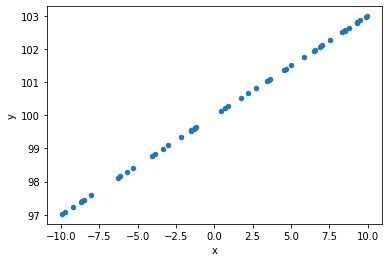

In [102]:
data_one_x.plot.scatter(x='x', y='y')

Okay. That looks *too* perfect.

Most data in the real world look less linear than that.

So let's add a little bit of noise. Noise are random pertubations to your data that happens naturally in the real world. We will simulate some noise.

Otherwise our linear model will be too easy.

**Note:** We can generate some noise by picking numbers in a [normal distribution (also called bell curve)](http://www.statisticshowto.com/probability-and-statistics/normal-distributions/) around zero.

In [92]:
# First, let's create some noise to make our data a little bit more spread out.

# generate some normally distributed noise
noise_one_x = numpy.random.normal(size=NUM_INPUTS)

In [93]:
# Now let's create the 'y' variable
# It turns out you can make a new column in pandas just by doing the below.
# It's so simple!
data_one_x['y'] = data_one_x['y'] + noise_one_x

<AxesSubplot:xlabel='x', ylabel='y'>

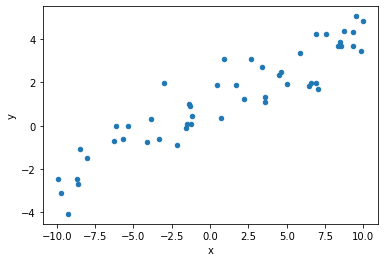

In [94]:
data_one_x.plot.scatter(x='x', y='y')

Great!

This looks more like real data now.

## Training

Now that we have our data, we can train our model to find the best fit line. We will use the linear model module from the scikit-learn library to do this.

Note: you may get a warning about LAPACK. According to [this discussion on the scikit-learn github page](https://github.com/scipy/scipy/issues/5998), this is safe to ignore.

In [104]:
# This creates an "empty" linear model

model_one_x = linear_model.LinearRegression()


First, we need to reshape our data.

Currently, our data looks like the following:

```python
# data_one_x['x'] looks like
[-3.44342026,  9.60082542,  4.99683803,  7.11339915,  9.69287893, ...]

```

In other words, it's just a list.

However, this isn't sufficient.

That's because later on, we will use a command called `.fit()` and this command expects our data to look like a list of lists.

For example:

```python
[[-3.44342026],
[ 9.60082542],
[ 4.99683803],
[ 7.11339915],
[ 9.69287893],
[-5.1383316 ],
[ 8.96638209],
...
[-9.12492363]]
```

We will use a the command `.reshape()`.

In [105]:
# Run this code
x_one_x = data_one_x['x'].values.reshape(-1, 1)
y_one_x = data_one_x['y'].values.reshape(-1, 1)

There we go. Now we can "fit" the data.

"Fitting" the data means to give the "empty model" real data and ask it to find the "best parameters" that "best fits" the data.

Using the amazing `sklearn` library, it's as easy as running the `.fit()` command.

Note: you may get a warning about LAPACK. According to [this discussion on the scikit-learn github page](https://github.com/scipy/scipy/issues/5998), this is safe to ignore.

In [106]:
# Run this code
model_one_x.fit(X=x_one_x, y=y_one_x)

LinearRegression()

## Results and Visualization

Now, let's see what our model learned. We can look at the results numerically:

In [107]:
def print_model_fit(model):
    # Print out the parameters for the best fit line
    print('Intercept: {i}  Coefficients: {c}'.format(i=model.intercept_, c=model.coef_))

In [108]:
print_model_fit(model_one_x)

Intercept: [1.]  Coefficients: [[1.]]


In [58]:
## How would this model make predictions?

# Let's make some new data that have the following values and see how to predict their corresponding 'y' values.

# Print out the model's guesses for some values of x
new_x_values = [ [-1.23], [0.66], [1.98] ]

predictions = model_one_x.predict(new_x_values)

print(predictions)

[[0.65072074]
 [4.47338566]
 [7.14318338]]


In [59]:
# Let's print them a little bit nicer
for datapoint, prediction in zip(new_x_values, predictions):
    print('Model prediction for {}: {}'.format(datapoint[0], prediction))

Model prediction for -1.23: [0.65072074]
Model prediction for 0.66: [4.47338566]
Model prediction for 1.98: [7.14318338]


We can also look at them graphically.

In [60]:
def plot_best_fit_line(model, x, y):
    # create the figure
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('Data and Best-Fit Line')
    matplotlib.pyplot.xlabel('x values')
    matplotlib.pyplot.ylabel('y values')

    # put the generated dataset points on the graph
    matplotlib.pyplot.scatter(x, y)
    
    # Now we actually want to plot the best-fit line.
    # To simulate that, we'll simply generate all the
    # inputs on the graph and plot that.
    # predict for inputs along the graph to find the best-fit line
    X = numpy.linspace(MIN_X, MAX_X) # generates all the possible values of x
    Y = model.predict(list(zip(X)))
    matplotlib.pyplot.plot(X, Y)

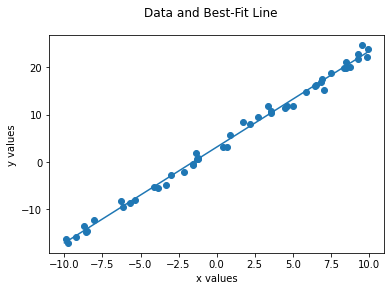

In [61]:
plot_best_fit_line(model_one_x, x_one_x, y_one_x)

# Exercise Option #1 - Standard Difficulty

Answer the following questions about dataset 1:
1. Take a look at the output of the `print_model_fit()` function in the "Results and Visualization" section above. What numbers did you expect to see printed if the linear regression code was working, and why?
1. What numbers did you expect the model to predict when we gave it our new x values, -1.23, 0.66, and 1.98, and why?
1. What did you expect to see on the graph if the linear regression code was working, and why?
1. Pick some lines of code that you could change to continue testing that the linear regression worked properly. What lines did you choose and how did you change them? How did the output change, and why does that tell you that the code is working correctly?

## One:

- I would expect to see numbers similar to the y intercept and slope of the line that the model is trying to fit (𝑦=0.3𝑥+1). In this particular example, I would expect to see an intercept close to 1, and a coefficients close to 0.3. 

## Two:

- I expected it to print out the corresponding y values when plugged back into the original equation. 

## Three:

- I expected to see a line similar to the graph of 𝑦=0.3𝑥+1. 

## Four 

- I changed the equation of the line to ```data_one_x['y'] = 1 * data_one_x['x'] + 1``` and verified that the code still functioned. The output was ```Intercept: [1.]  Coefficients: [[1.]]``` meaning that it came to the correct answer, verifying that the code was working properly. 



### Fake Dataset 2 - Two x Values

Let's look at a dataset has two inputs, like [the tree example in our notes](https://jennselby.github.io/MachineLearningCourseNotes/#linear-regression).

**NOTE**: This will make it a littler harder to visualize, particularly because you cannot rotate the graph interactively in the Jupyter notebook. If you are interested in looking more closely at this graph, you can copy the code below in the next several cells into a file and run it through Python normally. This will open a graph window that will allow you to drag to rotate the graph.

In [143]:
# generate some normally distributed noise
noise_two_x = numpy.random.normal(size=NUM_INPUTS)

# randomly pick pairs of numbers for x
x1_two_x = numpy.random.uniform(low=MIN_X, high=MAX_X, size=NUM_INPUTS)
x2_two_x = numpy.random.uniform(low=MIN_X, high=MAX_X, size=NUM_INPUTS)

y_two_x = 1 * x1_two_x + 1 * x2_two_x +1 + noise_two_x


In [144]:
data_two_x = pd.DataFrame(data=x1_two_x, columns = ['x1'])

In [145]:
data_two_x['x2'] = x2_two_x
data_two_x['y'] = y_two_x

In [146]:
data_two_x.head()

,x1,x2,y
0,8.931123,4.883604,15.192078
1,1.385313,-5.028145,-1.879798
2,2.766098,-1.146493,1.828016
3,0.342966,-2.683973,-2.159409
4,4.056860,-9.616215,-2.953200


In [150]:
# use scikit-learn's linear regression model and fit to our data
model_two_x = linear_model.LinearRegression()
model_two_x.fit(data_two_x[['x1', 'x2']], data_two_x['y'])

# Print out the parameters for the best fit plane
print_model_fit(model_two_x)


Intercept: 1.061603912300199  Coefficients: [0.97499882 0.96615802]


In [148]:
## Now create a function that can plot in 3D

def plot_3d(model, x1, x2, y):
    # 3D Plot
    # create the figure
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('3D Data and Best-Fit Plane')
    
    # get the current axes, and tell them to do a 3D projection
    axes = fig.gca(projection='3d')
    axes.set_xlabel('x1')
    axes.set_ylabel('x2')
    axes.set_zlabel('y')
    
    
    # put the generated points on the graph
    axes.scatter(x1, x2, y)

    # predict for input points across the graph to find the best-fit plane
    # and arrange them into a grid for matplotlib
    X1 = X2 = numpy.arange(MIN_X, MAX_X, 0.05)
    X1, X2 = numpy.meshgrid(X1, X2)
    Y = numpy.array(model.predict(list(zip(X1.flatten(), X2.flatten())))).reshape(X1.shape)

    # put the predicted plane on the graph
    axes.plot_surface(X1, X2, Y, alpha=0.1)

    # show the plots
    matplotlib.pyplot.show()

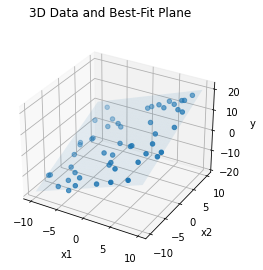

In [149]:
# Now let's use the function
plot_3d(model_two_x, x1_two_x, x2_two_x, y_two_x)

# Exercise Option #2 - Standard Difficulty

Now, answer the following questions about [Fake Dataset 2](#Fake-Dataset-2---Two-x-Values):
1. Take a look at the output of the `print_model_fit()` function for this above dataset. What output did you expect to see printed if the linear regression code was working, and why?
1. What did you expect to see on the graph if the linear regression code was working, and why?
1. Pick some lines of code that you could change to continue testing that the linear regression worked properly. What lines did you choose and how did you change them? How did the output change, and why does that tell you that the code is working correctly?
1. Explain any differences you noticed between working with dataset 1 and dataset 2.

## One

- I expected it to print numbers similar to the definition of the plane: ```y_two_x = 0.5 * x1_two_x - 2.7 * x2_two_x- 2 + noise_two_x ``` `(0.5, -2.7, -2)`

## Two 

- I expected to see a plane similar to the one defined above. 

## Three

- I decided to change the definition of the graph to ```y_two_x = 1 * x1_two_x + 1 * x2_two_x +1 + noise_two_x``` and see if the code still functioned. ```print_model_fit``` printed ```Intercept: 1.061603912300199  Coefficients: [0.97499882 0.96615802]```, showing that the code was working properly. 

## Four 

- The only major differences were in the visulization section. I would imagine that these visualizations are very helpful with graphs contaning few dimenstions, but become far less useful as the math stays the same and the 



### Fake Dataset 3 - Quadratic

The new equation we'll try to model is $y = 0.7x^2 - 0.4x + 1.5$.


This dataset still just has one input, so the code is very similar to our first one. However, now the generating function is quadratic, so this one will be trickier to deal with.

Again, we'll go through dataset generation, training, and visualization.

In [69]:
# randomly pick numbers for x
x_quadratic = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1))

data_quadratic = pd.DataFrame(data=x_quadratic, columns=['x'])

In [70]:
# Let's create some noise to make our data a little bit more spread out.
# generate some normally distributed noise
noise_quadratic = numpy.random.normal(size=NUM_INPUTS)

In [71]:
# Let's generate the y values
# Our equation:
# y = 0.7x^2 - 0.4x + 1.5
data_quadratic['y'] = 0.7 * data_quadratic['x'] * data_quadratic['x'] - 0.4 * data_quadratic['x'] + 1.5 + noise_quadratic


Intercept: [26.34229083]  Coefficients: [[-0.48321049]]


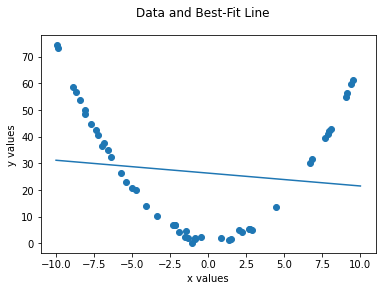

In [72]:
# get a 1D array of the input data
x_quadratic = data_quadratic['x'].values.reshape(-1, 1)
y_quadratic = data_quadratic['y'].values.reshape(-1, 1)

# Let's try use scikit-learn's linear regression model and fit to our data
model_quadratic = linear_model.LinearRegression()
model_quadratic.fit(x_quadratic, y_quadratic)

# show results
print_model_fit(model_quadratic)
plot_best_fit_line(model_quadratic, x_quadratic, y_quadratic)

# Exercise Option #3 - Advanced Difficulty

First, look over and understand the data for [Fake Dataset 3](#Fake-Dataset-3---Quadratic).

There are some issues here. Clearly the linear model that we have isn't working great.

Your challenge is to write some new code that will better fit a linear model to this data. There are a couple different ways to do this, but all of them will involve some new code. If you have ideas but just aren't sure how to translate them into code, please ask for help!

In [73]:
### Your code here






# Exercise Option #4 - Advanced Difficulty

Try adding some [regularization](https://jennselby.github.io/MachineLearningCourseNotes/#regularization-ridge-lasso-and-elastic-net) to your linear regression model. This will get you some practice in using the sci-kit learn documentation to find new functions and figure out how to use them.



In [74]:
### Your code here






In [ ]:
jk